In [2]:
#Question 1

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('Nifty50.csv')                #read file
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


In [4]:
x=((data['High']+data['Low']+data['Close'])/3).rolling(window=20).mean()              #taking mean of continous 20 days
x.dropna()

19      9550.319167
20      9559.389167
21      9565.566667
22      9570.259167
23      9577.319167
           ...     
489    11662.372500
490    11651.801667
491    11634.290833
492    11617.821667
493    11595.295833
Length: 475, dtype: float64

In [5]:
y=((data['High']+data['Low']+data['Close'])/3).rolling(window=20).std()               #taking standard deviation of continous 20 days
y.dropna()

19     100.766729
20      98.378835
21      98.018852
22      97.707369
23      93.220330
          ...    
489     66.405341
490     88.803566
491    117.896242
492    140.622225
493    169.656661
Length: 475, dtype: float64

In [6]:
BOLU= x+ 2*y                                                        #Bollinger Upper Band
BOLU.dropna(inplace=True)
BOLU

BOLD= x- 2*y                                                        #Bollinger Lower Band
BOLD.dropna(inplace=True)
BOLD

19      9348.785708
20      9362.631496
21      9369.528962
22      9374.844429
23      9390.878507
           ...     
489    11529.561818
490    11474.194535
491    11398.498349
492    11336.577217
493    11255.982512
Length: 475, dtype: float64

In [7]:
req_data=data.iloc[19:,:]                          #the data that is used

In [8]:
req_data['Call']=''
req_data['Typical Price']=(req_data['High']+req_data['Low']+req_data['Close'])/3     #the net price 

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
d1=req_data[req_data['Typical Price']<BOLD]                        #  if less than lower Bollinger Band call is buy

for ele in list(d1.index):
    #print(ele-19,end=' ')
    req_data.iloc[ele-19,7]='Buy'
#set(req_data['Call'])

E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
BOLM=(BOLD+BOLU)/2                                                  #medium of bollinger lower bound and bollinger upper bound

In [11]:
d1=req_data[(req_data['Typical Price']>BOLD) &(req_data['Typical Price']<BOLM)]

for ele in list(d1.index):
    #print(ele-19,end=' ')
    req_data.iloc[ele-19,7]='Hold Buy/ Liquidate Short'
req_data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Call,Typical Price
19,09-Jun-2017,9638.55,9676.25,9608.15,9668.25,163897548,9078.71,,9650.883333
20,12-Jun-2017,9646.70,9647.05,9598.50,9616.40,145786938,7686.89,,9620.650000
21,13-Jun-2017,9615.55,9654.15,9595.40,9606.90,133734363,7056.83,,9618.816667
22,14-Jun-2017,9621.55,9627.40,9580.45,9618.15,187378750,10540.68,,9608.666667
23,15-Jun-2017,9617.90,9621.40,9560.80,9578.05,176423424,9868.08,,9586.750000
...,...,...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,Hold Buy/ Liquidate Short,11546.466667
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,Buy,11395.166667
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,Buy,11304.816667
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,Buy,11291.916667


In [12]:
d1=req_data[(req_data['Typical Price']>BOLM) &(req_data['Typical Price']<BOLU)]

for ele in list(d1.index):
    #print(ele-19,end=' ')
    req_data.iloc[ele-19,7]='Hold Short/ Liquidate Buy'
req_data

E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Call,Typical Price
19,09-Jun-2017,9638.55,9676.25,9608.15,9668.25,163897548,9078.71,Hold Short/ Liquidate Buy,9650.883333
20,12-Jun-2017,9646.70,9647.05,9598.50,9616.40,145786938,7686.89,Hold Short/ Liquidate Buy,9620.650000
21,13-Jun-2017,9615.55,9654.15,9595.40,9606.90,133734363,7056.83,Hold Short/ Liquidate Buy,9618.816667
22,14-Jun-2017,9621.55,9627.40,9580.45,9618.15,187378750,10540.68,Hold Short/ Liquidate Buy,9608.666667
23,15-Jun-2017,9617.90,9621.40,9560.80,9578.05,176423424,9868.08,Hold Short/ Liquidate Buy,9586.750000
...,...,...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,Hold Buy/ Liquidate Short,11546.466667
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,Buy,11395.166667
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,Buy,11304.816667
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,Buy,11291.916667


In [13]:
d1=req_data[req_data['Typical Price']>BOLU]

for ele in list(d1.index):
    #print(ele-19,end=' ')
    req_data.iloc[ele-19,7]='Short'
req_data.reset_index=True
req_data

E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Call,Typical Price
19,09-Jun-2017,9638.55,9676.25,9608.15,9668.25,163897548,9078.71,Hold Short/ Liquidate Buy,9650.883333
20,12-Jun-2017,9646.70,9647.05,9598.50,9616.40,145786938,7686.89,Hold Short/ Liquidate Buy,9620.650000
21,13-Jun-2017,9615.55,9654.15,9595.40,9606.90,133734363,7056.83,Hold Short/ Liquidate Buy,9618.816667
22,14-Jun-2017,9621.55,9627.40,9580.45,9618.15,187378750,10540.68,Hold Short/ Liquidate Buy,9608.666667
23,15-Jun-2017,9617.90,9621.40,9560.80,9578.05,176423424,9868.08,Hold Short/ Liquidate Buy,9586.750000
...,...,...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,Hold Buy/ Liquidate Short,11546.466667
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,Buy,11395.166667
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,Buy,11304.816667
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,Buy,11291.916667


In [14]:
#multiclass classification

In [15]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [16]:
copy_data=data.copy()                      #make copy of dataframe
copy_data['BOLD']=BOLD
copy_data['BOLU']=BOLU
copy_data['BOLM']=BOLM
copy_data['Price']=(copy_data['High']+copy_data['Low']+copy_data['Close'])/3
copy_data.dropna(inplace=True)
x_train=copy_data.iloc[:150,7:11]                       #taking training data points upto 150 points
y_train=req_data.iloc[:150,7]                            
x_test=copy_data.iloc[150:,7:11]                        #taking testing points from 150 index upto end
y_test=req_data.iloc[150:,7]
x_test

,BOLD,BOLU,BOLM,Price
169,10321.732139,10727.722861,10524.727500,10746.000000
170,10353.717701,10737.188966,10545.453333,10716.883333
171,10353.871946,10767.598054,10560.735000,10752.766667
172,10346.231252,10812.275415,10579.253333,10828.966667
173,10343.278090,10857.038577,10600.158333,10865.150000
...,...,...,...,...
489,11529.561818,11795.183182,11662.372500,11546.466667
490,11474.194535,11829.408799,11651.801667,11395.166667
491,11398.498349,11870.083318,11634.290833,11304.816667
492,11336.577217,11899.066117,11617.821667,11291.916667


In [17]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#use the logistic regression model of muticlass
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
LR.predict(x_test)
print('Using Logistic Regression Score obtained ',end=" ")
print(round(LR.score(x_test,y_test), 4))
print()

#use the support vector machine model of multiclass
SVM = svm.SVC(decision_function_shape="ovo").fit(x_train, y_train)
SVM.predict(x_test)
print('Using Support Vector Machines the score obtained is equal to ',end=" ")
print(round(SVM.score(x_test, y_test), 4))
print()

#use the random forest classifier of multiclass
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train)
RF.predict(x_test)
print('Using Random Forest Classifier the score obtained is equal to ',end=" ")
print(round(RF.score(x_test, y_test), 4))
print()

#use the neural network classifier of multiclass
NN = MLPClassifier(random_state=0).fit(x_train, y_train)
NN.predict(x_test)
print('Using Neural Network model the score obtained is equal to',end=" ")
print(round(NN.score(x_test, y_test), 4))

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Using Logistic Regression Score obtained  0.9877

Using Support Vector Machines the score obtained is equal to  0.5569

Using Random Forest Classifier the score obtained is equal to  0.5815

Using Neural Network model the score obtained is equal to 0.5877


In [18]:
d={}
d['Logistic Regression']=98.77
d['Support Vector Machine']=55.69
d['Random Forest Classifier']=58.15
d['Neural Network']=58.77
print('{:<30s}|{:>30s}'.format('MODEL','Predictive Accuracy'))
print('=====================================================================')
for ele in d:
    print('{:<30s}|{:>30f}'.format(ele,d[ele]))
print("======================================================================")

MODEL                         |           Predictive Accuracy
Logistic Regression           |                     98.770000
Support Vector Machine        |                     55.690000
Random Forest Classifier      |                     58.150000
Neural Network                |                     58.770000


In [19]:
#Question 2
import pandas as pd

In [20]:
data=pd.read_csv('RAYMOND.csv')                   #import random dataframe
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,464539,3.739298e+08,9381,22009,4.74


In [21]:
data['Diff_Close_Open']=(data['Close Price']-data['Open Price'])      #add column containg diff of open and close price
data['Diff_Close_Open']=data['Diff_Close_Open'].pct_change()           #convert them to percentage
data['Diff_Close_Open'].dropna(inplace =True)

In [22]:
data['Diff_High_Low']=(data['High Price']-data['Low Price'])
data['Diff_High_Low']=data['Diff_Close_Open'].pct_change()
data['Diff_High_Low'].dropna(inplace =True)

In [23]:
data['Roll_Mean']=data['Close Price'].rolling(window=5).mean()             #take the mean of close_price of continous 5 days
data['Roll_Mean']=data['Roll_Mean'].pct_change()
data['Roll_Mean'].dropna(inplace =True)

In [24]:
data['Roll_Std']=data['Close Price'].rolling(window=5).mean()
data['Roll_Std']=data['Roll_Std'].pct_change()
data['Roll_Std'].dropna(inplace =True)

In [25]:
data.dropna(inplace=True)

In [26]:
data['Action']=''

In [27]:
data.iloc[488,:]

Symbol                        RAYMOND
Series                             EQ
Date                      13-May-2019
Prev Close                      804.4
Open Price                        803
High Price                        803
Low Price                      774.75
Last Price                        782
Close Price                    779.35
Average Price                  789.32
Total Traded Quantity          342185
Turnover                  2.70093e+08
No. of Trades                    9023
Deliverable Qty                 29418
% Dly Qt to Traded Qty            8.6
Diff_Close_Open               3.26126
Diff_High_Low                 -2.4237
Roll_Mean                 -0.00662235
Roll_Std                  -0.00662235
Action                               
Name: 493, dtype: object

In [28]:
for ele in list(data.index):
    ele=ele-6
    if data.iloc[ele,8]<data.iloc[ele+1,8]:
        data.iloc[ele,19]=1
    if data.iloc[ele,8]>data.iloc[ele+1,8]:
        data.iloc[ele,19]=-1


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Diff_Close_Open,Diff_High_Low,Roll_Mean,Roll_Std,Action
5,RAYMOND,EQ,22-May-2017,723.10,728.30,741.30,705.50,710.60,715.95,724.56,384821,2.788269e+08,11424,51189,13.30,-0.504016,1.177349,-0.014915,-0.014915,-1
6,RAYMOND,EQ,23-May-2017,715.95,713.00,723.80,681.25,698.25,699.55,699.33,501206,3.505097e+08,12935,126651,25.27,0.089069,-1.176718,-0.022758,-0.022758,-1
7,RAYMOND,EQ,24-May-2017,699.55,704.90,705.50,642.20,667.00,662.25,674.73,591516,3.991163e+08,16424,141211,23.87,2.171004,23.374451,-0.033086,-0.033086,1
8,RAYMOND,EQ,25-May-2017,662.25,630.00,686.25,598.10,682.90,678.30,651.28,2850149,1.856244e+09,54827,315039,11.05,-2.132474,-1.982252,-0.019350,-0.019350,1
9,RAYMOND,EQ,26-May-2017,678.30,681.70,733.90,679.65,718.65,721.15,710.37,1455736,1.034107e+09,32550,237806,16.34,-0.183230,-0.914076,-0.000560,-0.000560,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RAYMOND,EQ,07-May-2019,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78,-0.944069,-1.607436,0.013529,0.013529,-1
490,RAYMOND,EQ,08-May-2019,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52,-1.275862,0.351449,0.009117,0.009117,-1
491,RAYMOND,EQ,09-May-2019,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15,-6.375000,3.996622,0.016324,0.016324,-1
492,RAYMOND,EQ,10-May-2019,805.30,809.95,815.00,795.05,804.00,804.40,804.95,464539,3.739298e+08,9381,22009,4.74,-2.290698,-0.640675,0.011059,0.011059,-1


In [30]:
x=data.iloc[:,15:-1]
x_train=x.iloc[:200,0:4]                    #taking 200 data points as training
x_test=x.iloc[200:,0:4]                     
x_train

,Diff_Close_Open,Diff_High_Low,Roll_Mean,Roll_Std
5,-0.504016,1.177349,-0.014915,-0.014915
6,0.089069,-1.176718,-0.022758,-0.022758
7,2.171004,23.374451,-0.033086,-0.033086
8,-2.132474,-1.982252,-0.019350,-0.019350
9,-0.183230,-0.914076,-0.000560,-0.000560
...,...,...,...,...
200,-1.768166,-0.049434,0.003149,0.003149
201,0.855856,-1.484036,-0.006457,-0.006457
202,-0.046117,-1.053883,-0.010263,-0.010263
203,-0.122137,1.648453,-0.011762,-0.011762


In [62]:
y=data.iloc[:,-1]
y=y.astype('int')
y_train=(y.iloc[:200])
y_test=(y.iloc[200:])


In [63]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [81]:
x_test.replace(np.inf,np.nan,inplace=True)
y_test.replace(np.inf,np.nan,inplace=True)
x_test.dropna(inplace=True)
y_test.dropna(inplace=True)

['Diff_Close_Open', 'Diff_High_Low', 'Roll_Mean', 'Roll_Std']

In [84]:
#using random forest classifier 
RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0).fit(x_train, y_train)
#RF.predict(x_test)
print('Using Random Forest Classifier the score obtained is equal to ',end=" ")
print(round(RF.score(x_test, y_test[1:]), 4))
print()

Using Random Forest Classifier the score obtained is equal to  0.5417



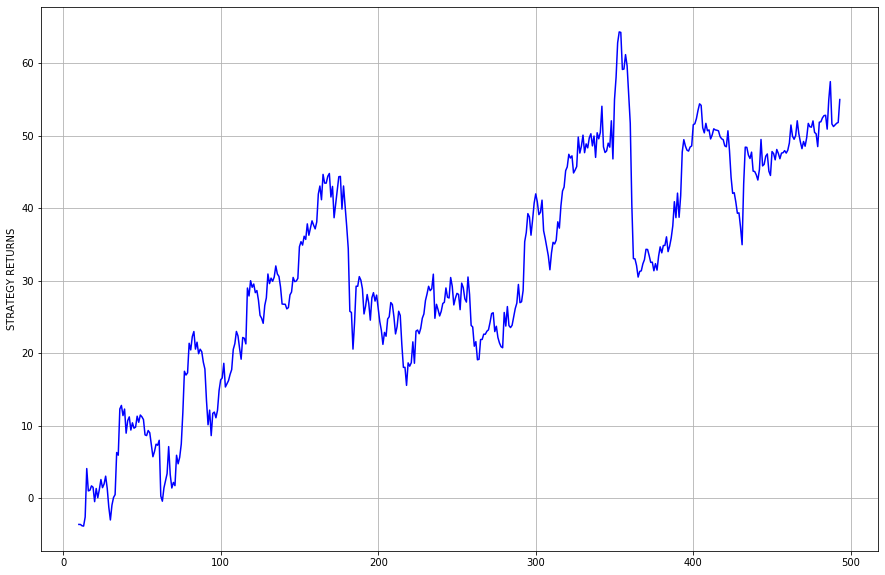

In [141]:
data['Predict_Signal']=1
data.iloc[201:,21]=RF.predict(x_test)


data['SPY_Returns']= np.log(data['Close Price']/data['Close Price'].shift(1))
cum_returns=data[5:]['SPY_Returns'].cumsum()*100
data['Strategy_Returns']=data['SPY_Returns']*data['Predict_Signal'].shift(1)
Cum_Stategy=data[5:]['Strategy_Returns'].cumsum()*100
plt.figure(figsize=(15,10))
#plt.plot(cum_returns,color='r')(
plt.ylabel('STRATEGY RETURNS')
plt.grid()
plt.plot(Cum_Stategy,color='b')
plt.show()
